In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
from nltk.corpus import stopwords

In [8]:
sw = stopwords.words('english')
print(len(sw))

179


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CV_Models/sentiment_data.txt',sep=";",header=None)
df.head()

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df.columns = ['Text','Sentiment']
df.head()

,Text,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df['Sentiment'].value_counts()

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

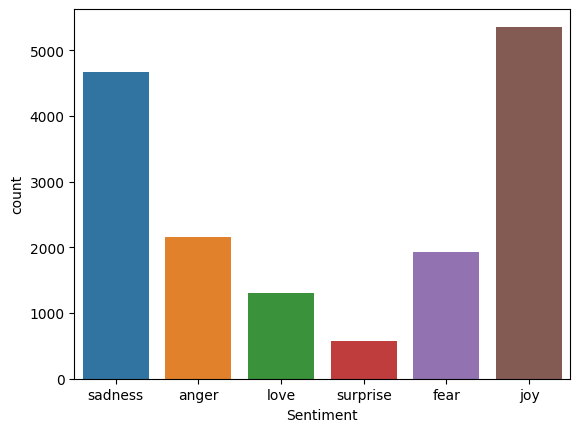

In [14]:
sns.countplot(x=df['Sentiment'])
plt.show()

In [15]:
!pip install text_hammer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.28 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.1 which is incompatible.


In [16]:
import text_hammer as th

In [19]:
df.shape

(15999, 2)

In [18]:
def text_preprocessing(df,col):
    df[col] = df[col].progress_apply(lambda x:str(x).lower())
    df[col] = df[col].progress_apply(lambda x: th.cont_exp(x))   # you're -> you are; i'm -> i am, i'll
    df[col] = df[col].progress_apply(lambda x: th.remove_emails(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_html_tags(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_stopwords(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_special_chars(x))
    df[col] = df[col].progress_apply(lambda x: th.make_base(x))  # example - ran -> run,
    return(df)

In [20]:
df = text_preprocessing(df, "Text")

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

In [21]:
df['Sentiment'].value_counts()

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

In [22]:
encoded_dict  = {'anger':0,'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}

In [23]:
x = df['Text']
y = df['Sentiment']
print(x.shape)
print(y.shape)

(15999,)
(15999,)


In [25]:
df_joy = df[df['Sentiment']=="joy"]
print(df_joy.shape)
df_sadness = df[df['Sentiment']=="sadness"]
print(df_sadness.shape)
df_anger = df[df['Sentiment']=="anger"]
print(df_anger.shape)
df_fear = df[df['Sentiment']=="fear"]
print(df_fear.shape)
df_love = df[df['Sentiment']=="love"]
print(df_love.shape)
df_surprise = df[df['Sentiment']=="surprise"]
print(df_surprise.shape)

(5361, 2)
(4666, 2)
(2159, 2)
(1937, 2)
(1304, 2)
(572, 2)


In [27]:
from nltk import word_tokenize, FreqDist

In [28]:
def find_topN_word_freq_4each_emotion(data,col,word_list):
  for i in data[col]:
    word_list.extend(word_tokenize(i))
  freq_dist = FreqDist(word_list).most_common(100)
  return freq_dist

In [29]:
wt_joy = []
freq_dist_joy = find_topN_word_freq_4each_emotion(df_joy,'Text', wt_joy)
print(freq_dist_joy)

[('feel', 5453), ('like', 1016), ('m', 939), ('I', 807), ('not', 451), ('time', 325), ('s', 303), ('know', 288), ('feeling', 285), ('think', 274), ('want', 270), ('t', 259), ('day', 241), ('love', 238), ('do', 233), ('go', 232), ('good', 230), ('people', 206), ('life', 195), ('thing', 194), ('little', 189), ('need', 186), ('pretty', 184), ('work', 177), ('look', 168), ('way', 161), ('come', 152), ('happy', 152), ('get', 150), ('make', 148), ('year', 134), ('right', 124), ('try', 120), ('help', 119), ('find', 118), ('today', 118), ('don', 114), ('sure', 110), ('well', 107), ('leave', 105), ('write', 102), ('start', 99), ('tell', 98), ('say', 94), ('have', 94), ('bit', 91), ('content', 88), ('important', 87), ('read', 86), ('friend', 86), ('long', 85), ('support', 83), ('excited', 82), ('lot', 82), ('glad', 81), ('free', 80), ('cool', 79), ('able', 78), ('hope', 78), ('thankful', 78), ('new', 77), ('strong', 76), ('live', 76), ('safe', 75), ('family', 75), ('http', 74), ('week', 73), ('c

In [30]:
df_joy = pd.DataFrame(freq_dist_joy,columns=['joy_word','joy_count'])
df_joy.head()

,joy_word,joy_count
0,feel,5453
1,like,1016
2,m,939
3,I,807
4,not,451


In [31]:
from wordcloud import WordCloud

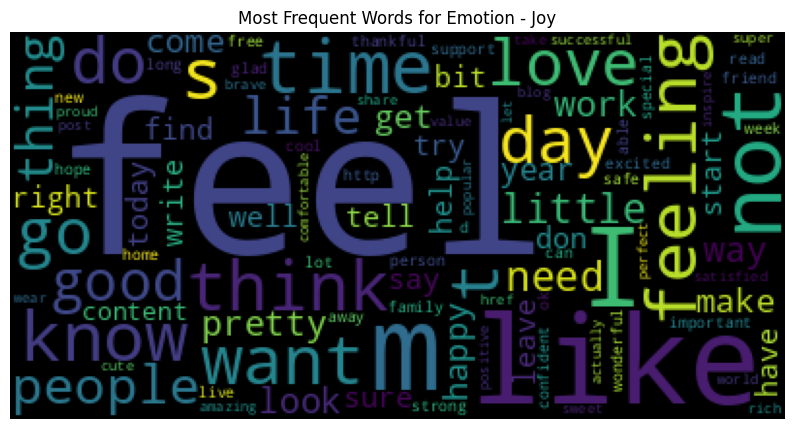

In [32]:
joy = WordCloud().generate_from_frequencies(dict(freq_dist_joy))
plt.figure(figsize=(10,10))
plt.title('Most Frequent Words for Emotion - Joy')
plt.imshow(joy)
plt.axis('off')
plt.show()

In [33]:
wt_anger = []
freq_dist_anger = find_topN_word_freq_4each_emotion(df_anger,'Text', wt_anger)
print(freq_dist_anger)

[('feel', 2168), ('m', 420), ('like', 391), ('I', 347), ('not', 270), ('t', 143), ('time', 137), ('know', 136), ('want', 129), ('do', 124), ('feeling', 120), ('think', 118), ('thing', 109), ('people', 106), ('little', 105), ('s', 104), ('way', 92), ('go', 86), ('angry', 85), ('hate', 79), ('get', 78), ('bit', 77), ('day', 76), ('life', 73), ('wrong', 71), ('irritable', 70), ('cold', 68), ('don', 68), ('friend', 66), ('fuck', 65), ('need', 65), ('start', 64), ('can', 64), ('greedy', 63), ('come', 63), ('try', 62), ('resentful', 60), ('selfish', 59), ('bother', 59), ('irritated', 57), ('love', 57), ('work', 56), ('violent', 55), ('cranky', 55), ('mad', 55), ('dissatisfied', 54), ('dangerous', 54), ('rude', 53), ('rush', 52), ('agitated', 52), ('say', 51), ('jealous', 51), ('make', 51), ('frustrated', 50), ('bitchy', 50), ('right', 49), ('good', 49), ('bitter', 48), ('today', 48), ('annoyed', 48), ('petty', 46), ('rebellious', 45), ('pissed', 44), ('impatient', 42), ('help', 42), ('find',

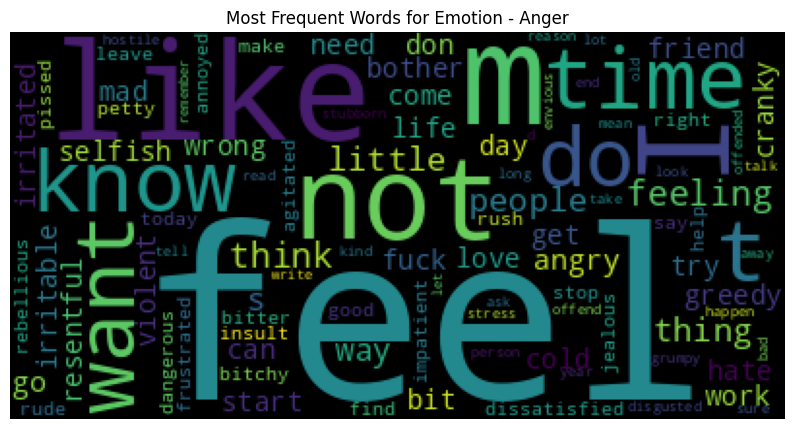

In [34]:
anger = WordCloud().generate_from_frequencies(dict(freq_dist_anger))
plt.figure(figsize=(10,10))
plt.title('Most Frequent Words for Emotion - Anger')
plt.imshow(anger)
plt.axis('off')
plt.show()

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
max_words = 90000

tk = Tokenizer(num_words=max_words)
tk.fit_on_texts(x)

word_index = tk.word_index
print(len(word_index))
print("Word index:\n", word_index)

12062
Word index:
 {'feel': 1, 'like': 2, 'm': 3, 'i': 4, 'not': 5, 'know': 6, 'feeling': 7, 'time': 8, 't': 9, 'want': 10, 'think': 11, 'do': 12, 's': 13, 'little': 14, 'love': 15, 'day': 16, 'thing': 17, 'people': 18, 'go': 19, 'life': 20, 'way': 21, 'bit': 22, 'need': 23, 'good': 24, 'work': 25, 'come': 26, 'start': 27, 'get': 28, 'look': 29, 'try': 30, 'pretty': 31, 'don': 32, 'make': 33, 'leave': 34, 'right': 35, 'find': 36, 'friend': 37, 'year': 38, 'today': 39, 'help': 40, 'can': 41, 'say': 42, 'tell': 43, 'have': 44, 'write': 45, 'long': 46, 'lot': 47, 'happy': 48, 'hate': 49, 'well': 50, 'week': 51, 'sure': 52, 'kind': 53, 'away': 54, 'home': 55, 'read': 56, 'person': 57, 'talk': 58, 'take': 59, 'd': 60, 'remember': 61, 'let': 62, 'new': 63, 'world': 64, 'actually': 65, 'bad': 66, 'end': 67, 'family': 68, 'http': 69, 'care': 70, 'live': 71, 'hope': 72, 'lose': 73, 'moment': 74, 'miss': 75, 'post': 76, 'mean': 77, 'able': 78, 'happen': 79, 'support': 80, 'place': 81, 'child': 8

In [38]:
print('\nWord Count in Doc\n',tk.word_counts)


Word Count in Doc
 OrderedDict([('do', 826), ('not', 1608), ('feel', 16211), ('humiliate', 49), ('hopeless', 65), ('damned', 3), ('hopeful', 59), ('care', 190), ('awake', 22), ('i', 2561), ('m', 2876), ('grab', 16), ('minute', 64), ('post', 178), ('greedy', 65), ('wrong', 127), ('nostalgic', 51), ('fireplace', 3), ('know', 1032), ('property', 4), ('grouchy', 27), ('little', 736), ('burden', 71), ('lately', 98), ('was', 95), ('sure', 232), ('take', 208), ('milligrams', 1), ('time', 955), ('recommend', 14), ('fall', 79), ('asleep', 18), ('lot', 264), ('fast', 28), ('like', 3000), ('funny', 69), ('confused', 55), ('life', 584), ('teenager', 19), ('jade', 12), ('year', 336), ('old', 151), ('man', 127), ('petrona', 1), ('petronas', 1), ('perform', 12), ('huge', 28), ('profit', 5), ('romantic', 51), ('suffer', 52), ('see', 137), ('mean', 175), ('run', 163), ('divine', 61), ('experience', 113), ('expect', 65), ('type', 55), ('spiritual', 11), ('encounter', 8), ('think', 843), ('s', 794), ('e

In [39]:
sequences = tk.texts_to_sequences(x)
print("Training sequences:\n", sequences)

Training sequences:
 [[12, 5, 1, 497], [1, 326, 3348, 369, 70, 969], [4, 3, 1204, 335, 76, 1, 327, 125], [1, 472, 3349, 6, 2848], [1, 823], [1, 14, 286, 184, 189, 5, 52], [59, 5841, 8, 1320, 249, 1111, 47, 801, 1, 2, 299], [1, 418, 20, 1069, 1453, 38, 97, 126], [5842, 38, 1, 5843, 1454, 802, 2524], [1, 473], [1, 2, 463, 3, 109, 77], [1, 83, 354, 147, 328, 419, 1534, 1917], [11, 13, 436, 8, 38, 1, 420], [1, 177, 287, 3, 3350], [3351, 1321, 768, 100, 681, 5844, 849, 30, 36, 8, 45, 1388, 20, 1032, 2849, 62, 3352, 2061, 1, 14, 336], [1, 612, 803], [12, 5, 1, 317], [1, 31, 421, 8], [27, 1, 682, 2062, 82, 103, 1535, 1763, 3353, 2062, 5845], [1, 2063, 683, 250, 2850, 25], [1, 337, 338, 42], [1, 146, 116, 1918, 40, 1, 665, 1764, 88, 1322, 1033, 824, 92, 67, 422, 17, 540], [1, 875, 825], [78, 40, 5846, 4179, 80, 2851, 129, 1, 195, 78, 40], [1, 2, 196, 12, 5, 280, 120, 104], [15, 166, 50, 46, 1919, 705, 5847, 71, 167, 181, 437, 133, 57, 220, 53, 18, 1, 137], [1, 970, 1920, 1205, 2, 4, 3, 1070, 1

In [40]:
# Get max training sequence length
max_len = max([len(x) for x in sequences])
print('Max training sequence length',max_len)

Max training sequence length 36


In [41]:
x_pad = pad_sequences(sequences, maxlen=max_len)   # pre-padding
print(len(x_pad))
print('Padded_sequences\n',x_pad)

15999
Padded_sequences
 [[   0    0    0 ...    5    1  497]
 [   0    0    0 ...  369   70  969]
 [   0    0    0 ...    1  327  125]
 ...
 [   0    0    0 ...  156   24 1067]
 [   0    0    0 ...    3  195    9]
 [   0    0    0 ...    1  145 2114]]


In [43]:
df1 = df.copy()
# encoded_dict  = {'anger':0,'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}

In [44]:
df['Sentiment'] = df['Sentiment'].map(encoded_dict)
df['Sentiment'].value_counts()

2    5361
4    4666
0    2159
1    1937
3    1304
5     572
Name: Sentiment, dtype: int64

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
# import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
vocab_size = max_words + 1
embedding_dim = 64   # output_dim
print(vocab_size)
print(embedding_dim)
print(x_pad.shape)

90001
64
(15999, 36)


In [50]:
m1 = Sequential()
m1.add(Embedding(vocab_size,embedding_dim,input_length=x_pad.shape[1]))
m1.add(LSTM(200, return_sequences=True))  # 36*64 is used as input for LSTM
m1.add(Dropout(0.5))
m1.add(LSTM(200))
m1.add(Dropout(0.5))
m1.add(Dense(128))
m1.add(Dropout(0.5))
m1.add(Dense(6,activation='softmax'))

m1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [52]:
y_lab = df['Sentiment']
print(y_lab.value_counts())

2    5361
4    4666
0    2159
1    1937
3    1304
5     572
Name: Sentiment, dtype: int64


In [53]:
h1 = m1.fit(x_pad,y_lab,batch_size=64,epochs=8)

Epoch 1/8
250/250 [==============================] - 34s 96ms/step - loss: 1.3160 - acc: 0.4592
Epoch 2/8
250/250 [==============================] - 7s 27ms/step - loss: 0.4697 - acc: 0.8246
Epoch 3/8
250/250 [==============================] - 4s 15ms/step - loss: 0.2013 - acc: 0.9319
Epoch 4/8
250/250 [==============================] - 4s 16ms/step - loss: 0.1294 - acc: 0.9557
Epoch 5/8
250/250 [==============================] - 3s 13ms/step - loss: 0.1080 - acc: 0.9631
Epoch 6/8
250/250 [==============================] - 4s 17ms/step - loss: 0.0935 - acc: 0.9679
Epoch 7/8
250/250 [==============================] - 3s 11ms/step - loss: 0.0696 - acc: 0.9750
Epoch 8/8
250/250 [==============================] - 5s 18ms/step - loss: 0.0609 - acc: 0.9789


In [54]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.head()

,loss,acc,Epochs
0,1.315971,0.459154,0
1,0.469687,0.824614,1
2,0.201278,0.931933,2
3,0.129392,0.955685,3
4,0.108017,0.963123,4


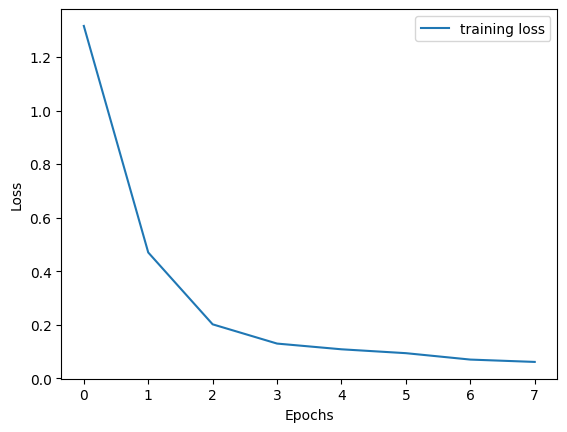

In [55]:
plt.plot(r1['Epochs'],r1['loss'],label='training loss')
# plt.plot(r1['Epochs'],r1['val_loss'],label='testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

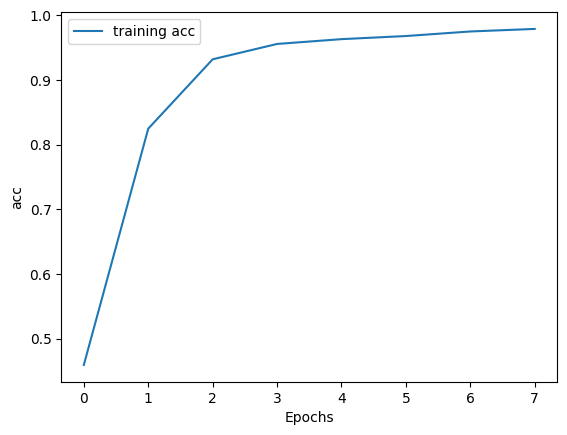

In [56]:
plt.plot(r1['Epochs'],r1['acc'],label='training acc')
# plt.plot(r1['Epochs'],r1['val_acc'],label='testing acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [57]:
ctest_df = pd.DataFrame({'sent':['I love solo travelling',
                                'Delighted to start my new job',
                                'Hard Challenges brining my morale down',
                                'Her absence was painful',
                                'His presence annoys me',
                                'I was scared of the darkness']})



In [58]:
def map_lab_2emotions(data):
    res = []
    d = {0:'anger',1:'fear',2:'joy',3:'love',4:'sadness',5:'surpise'}
    for i in data:
        if i in d.keys():
            res.append(d[i])
    return res

In [59]:
tokens = tk.texts_to_sequences(ctest_df['sent'])

test_sent = pad_sequences(tokens, maxlen=max_len)  # 36
emotions = m1.predict(test_sent)
print(emotions)
emotions_test = [np.argmax(i) for i in emotions]
print(emotions_test)

1/1 [==============================] - 1s 644ms/step
[[3.05706188e-02 1.32450182e-03 4.03033197e-01 5.51995814e-01
  8.25978722e-03 4.81613353e-03]
 [6.05119579e-03 1.12540636e-03 8.51272523e-01 2.08189413e-02
  1.19959444e-01 7.72405358e-04]
 [3.19728702e-01 7.71606434e-03 1.86893567e-01 5.66522107e-02
  4.27540749e-01 1.46872771e-03]
 [2.83869952e-02 2.02642311e-03 5.67268096e-02 2.34521623e-03
  9.10354674e-01 1.59862437e-04]
 [2.07433328e-01 1.91742871e-02 4.22574192e-01 1.80171117e-01
  1.61138386e-01 9.50874202e-03]
 [1.98791027e-01 7.55779088e-01 8.49359145e-04 3.72465933e-04
  4.01384048e-02 4.06975066e-03]]
[3, 2, 4, 4, 2, 1]


In [60]:
pred_emotions = map_lab_2emotions(emotions_test)
print(pred_emotions)

['love', 'joy', 'sadness', 'sadness', 'joy', 'fear']


In [61]:
ctest_df['pred_emotions'] = pred_emotions
ctest_df

,sent,pred_emotions
0,I love solo travelling,love
1,Delighted to start my new job,joy
2,Hard Challenges brining my morale down,sadness
3,Her absence was painful,sadness
4,His presence annoys me,joy
5,I was scared of the darkness,fear
